## Plotting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [ ]:
import scienceplots

In [ ]:
df = pd.read_csv('./EnsembleCropModes_v1.csv')

In [ ]:
plt.style.use(['science', 'no-latex'])

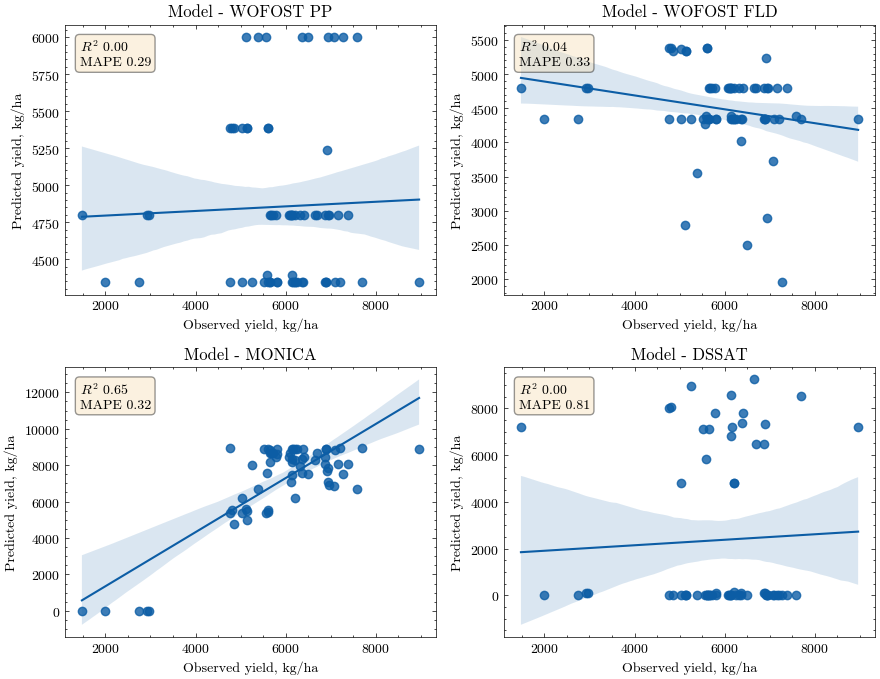

In [ ]:
target = 'MONICA'
fig, axes = plt.subplots(2,2, figsize=(9,7))
axes=axes.flatten()

import scipy
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['yield'], data[model_type])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)


def annotate(ax, data, x, y):
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=data[x], y=data[y])
    rmse = mean_absolute_percentage_error(data[x], data[y])
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
    # ax.text(0.43, 0.95, exp_type.capitalize(), transform=ax.transAxes, fontsize=16,
    #         verticalalignment='top', bbox=props)
    ax.text(.039, .85, f'$R^2$ {rvalue ** 2:.2f}\nMAPE {rmse:.2f}', transform=ax.transAxes,  bbox=props)

# g.map_dataframe(annotate)

models = ['WOFOST_PP', 'WOFOST_FLD', 'MONICA', 'DSSAT']
for i, model_type in enumerate(models):
    ax = sns.regplot(x='yield', y=model_type, data=df, ax=axes[i])
    annotate(ax, df, 'yield', model_type)
    # sns.jointplot(x='yield', y=model_type, data=df, kind="reg", ax=axes[i])
    # r2 = r2_score(df['yield'], df[model_type])
    axes[i].set_title(f"Model - {model_type.replace('_', ' ')}")
    axes[i].set_xlabel('Observed yield, kg/ha')
    axes[i].set_ylabel('Predicted yield, kg/ha')
    # g.map_dataframe(annotate)
fig.tight_layout()
plt.savefig('ModelComparison.png', dpi=300)
plt.show()

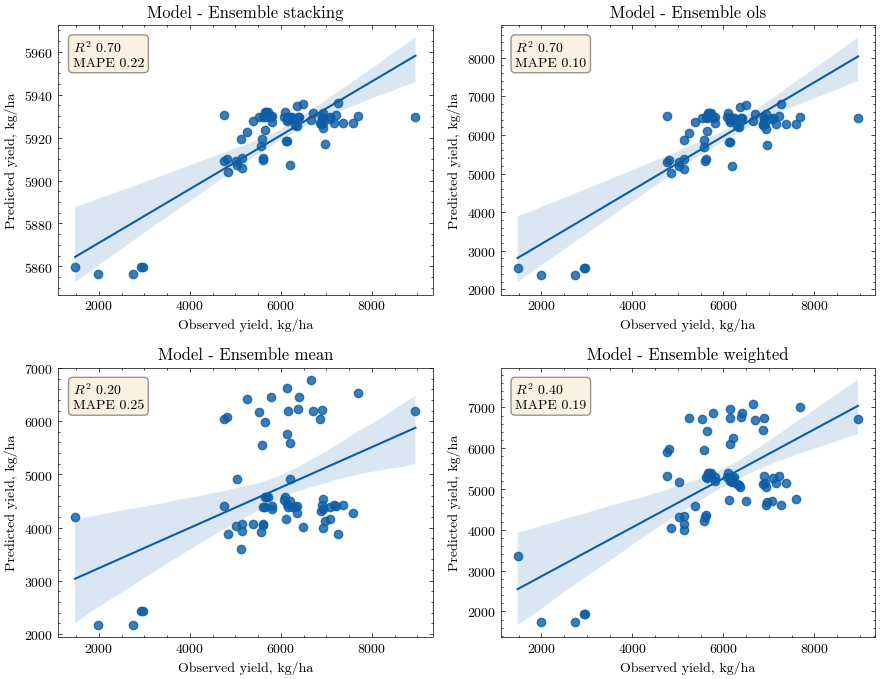

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(9,7))
axes=axes.flatten()
models = [ 'Ensemble_stacking', 'Ensemble_ols', 'Ensemble_mean','Ensemble_weighted']
for i, model_type in enumerate(models):
    ax = sns.regplot(x='yield', y=model_type, data=df, ax=axes[i])
    annotate(ax, df, 'yield', model_type)
    # sns.jointplot(x='yield', y=model_type, data=df, kind="reg", ax=axes[i])
    # r2 = r2_score(df['yield'], df[model_type])
    axes[i].set_title(f"Model - {model_type.replace('_', ' ')}")
    axes[i].set_xlabel('Observed yield, kg/ha')
    axes[i].set_ylabel('Predicted yield, kg/ha')
    # g.map_dataframe(annotate)
fig.tight_layout()
plt.savefig('ModelEnsemble.png', dpi=300)
plt.show()

## KdePlot

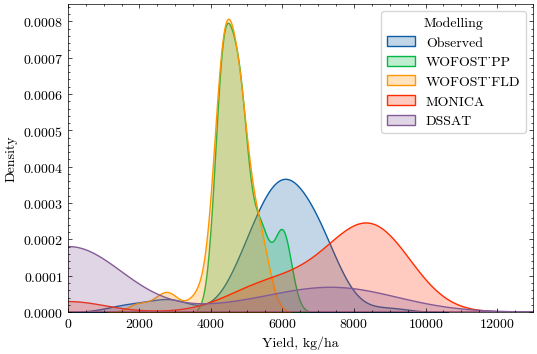

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='yield', fill=True, label='Observed')
models = ['WOFOST_PP', 'WOFOST_FLD', 'MONICA', 'DSSAT']
for model_type in models:
    sns.kdeplot(data=df, x=model_type, fill=True, label=model_type)
plt.legend(frameon=True, title="Modelling")
plt.xlabel('Yield, kg/ha')
plt.xlim(0, 13000)
plt.savefig('./kde_models.png', dpi=300)

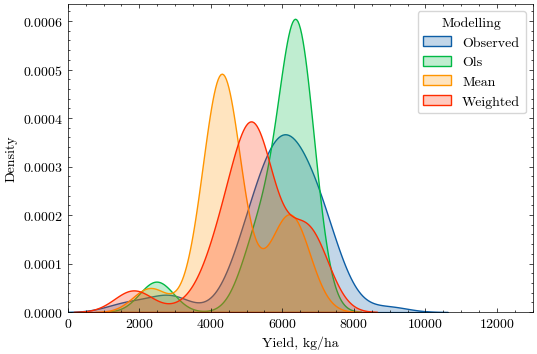

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='yield', fill=True, label='Observed')
models = [ 'Ensemble_ols', 'Ensemble_mean','Ensemble_weighted']
for model_type in models:
    sns.kdeplot(data=df, x=model_type, fill=True, label=(model_type[9:]).capitalize())
plt.legend(frameon=True, title="Modelling")
plt.xlabel('Yield, kg/ha')
plt.xlim(0, 13000)
plt.savefig('./kde_ensembles.png', dpi=300)